# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading data
data = pd.read_csv("/content/drive/MyDrive/MIT-IDSS/Assignment-2/ExtraaLearn.csv")
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


## Data Overview

- Observations
- Sanity checks

In [ ]:
# Checking data types of all columns
data.dtypes

,0
ID,object
age,int64
current_occupation,object
first_interaction,object
profile_completed,object
website_visits,int64
time_spent_on_website,int64
page_views_per_visit,float64
last_activity,object
print_media_type1,object


In [ ]:
# Check for duplicated data
dup = data.duplicated().sum()

print(f"There are {dup} duplicates in the data")

There are 0 duplicates in the data


In [ ]:
#Checking data dimensions
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

Rows: 4612
Columns: 15


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram


# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 6))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                       # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

In [ ]:
# Check the statistical summary of the data
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [ ]:
# Checking for missing values
data.isna().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


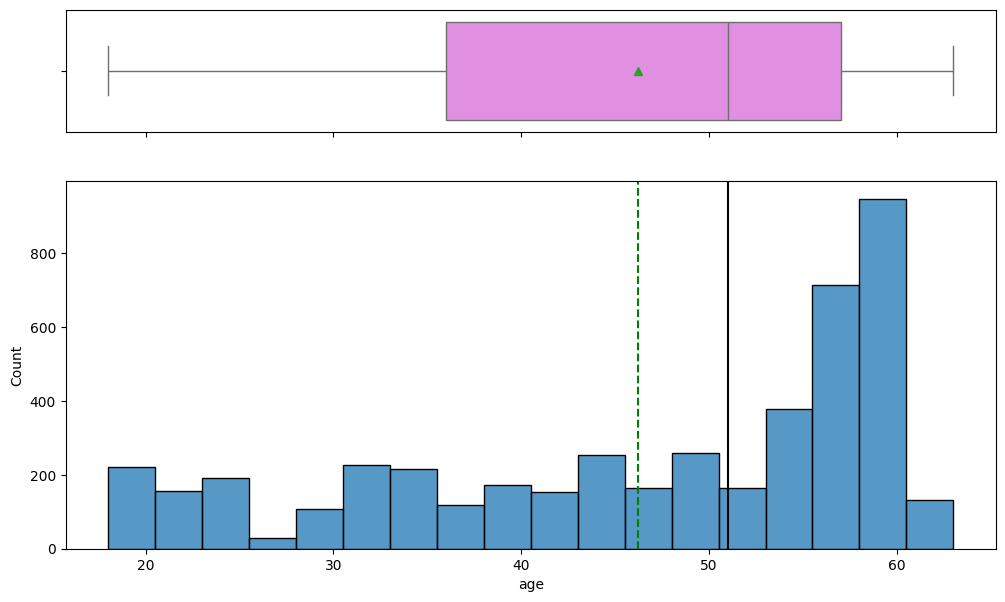

In [ ]:
# Plots for age
histogram_boxplot(data, "age")

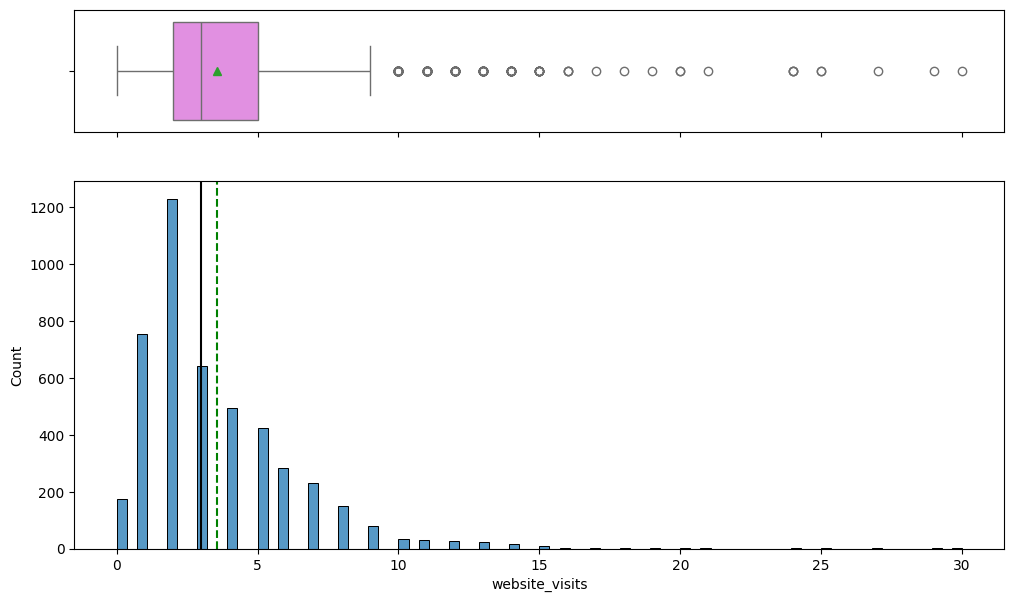

In [ ]:
# Plots for website_visits

histogram_boxplot(data, "website_visits")

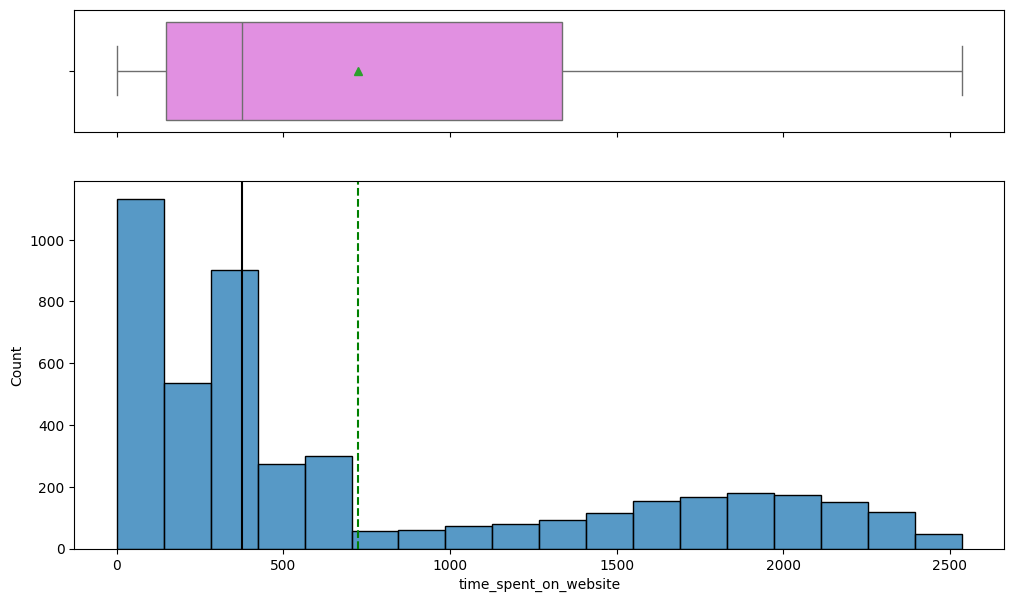

In [ ]:
# Plots for time_spent_on_website
histogram_boxplot(data, "time_spent_on_website")

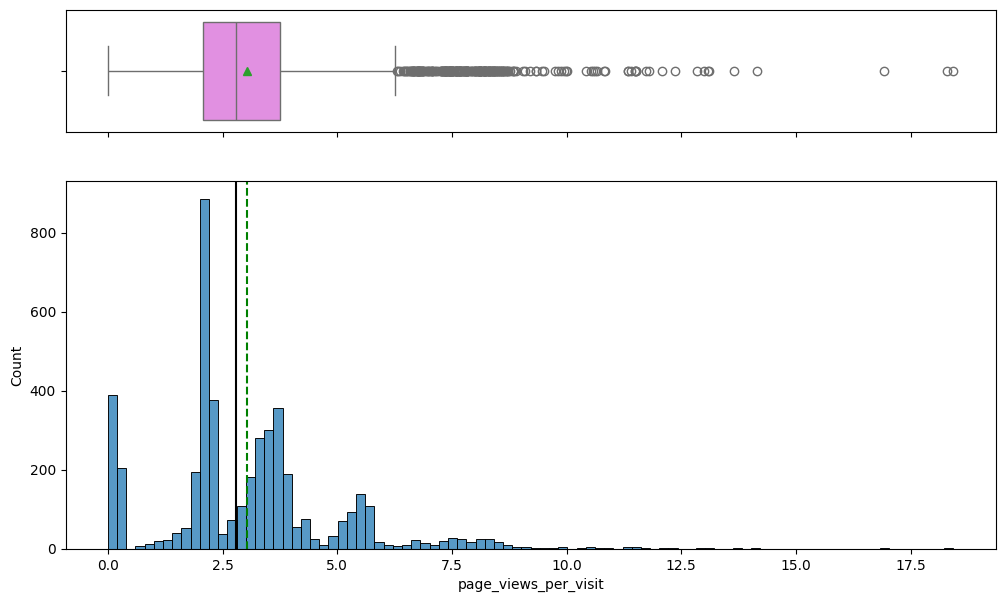

In [ ]:
# Plots for page_views_per_visit
histogram_boxplot(data, "page_views_per_visit")

In [ ]:
# Check distribution of categorical variables
cat_cols = data.drop("ID",axis=1).select_dtypes(include=["object","category"]).columns.tolist()

for c in cat_cols:
  print(data[c].value_counts(1))
  print('-'*50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

In [ ]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

#this function create a convertion table by categorical variable
def conv_table(df, by):
    t = df.groupby(by)["status"].agg(conv_rate=lambda s: s.mean(), n="count")
    t["conv_rate"] = (100*t["conv_rate"]).round(2)
    return t.sort_values("conv_rate", ascending=False)

#this function perform a chi squared test
def chi2_sig(df, by):
    ct = pd.crosstab(df[by], df["status"])
    chi2, p, dof, *_ = chi2_contingency(ct)
    return p, ct

In [ ]:
# Convert Yes/No to 1/0
map = {"Yes":1,"No":0}
data = data.applymap(lambda s: map.get(s) if s in map else s)

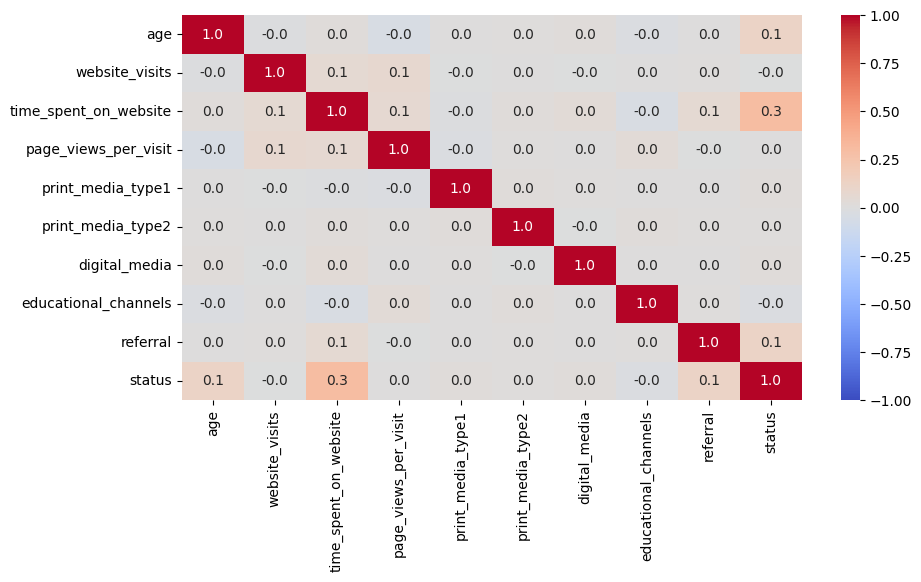

In [ ]:
#select only numeric columns
numeric_df = data.select_dtypes(include='number')

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".1f", cmap='coolwarm', vmax = 1, vmin = -1)
plt.show()

#### Question 1: Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

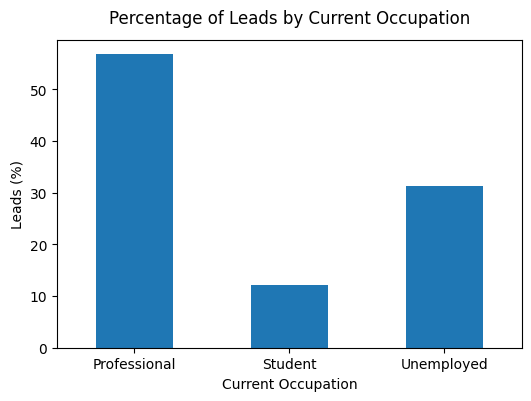

                    conv_rate     n
current_occupation                 
Professional            35.51  2616
Unemployed              26.58  1441
Student                 11.71   555
p-valor (chi²): 5.918199675434894e-30


In [ ]:
# Percentage of leads by current occupation
occ_counts = data["current_occupation"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6,4))
occ_counts.plot(kind="bar")

plt.title("Percentage of Leads by Current Occupation", pad=12)
plt.xlabel("Current Occupation")
plt.ylabel("Leads (%)")
plt.xticks(rotation=0)
plt.show()

print(conv_table(data, "current_occupation"))
p, ct = chi2_sig(data, "current_occupation")
print("p-valor (chi²):", p)

- Most leads are Professionals, followed by Unemployed and Students .

- Conversion rates differ clearly: Professionals (35.5%) > Unemployed (26.6%) > Students (11.7%).

- The chi-square test (p < 0.001) indicating that current occupation significantly impacts lead conversion.

#### Question 2: The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

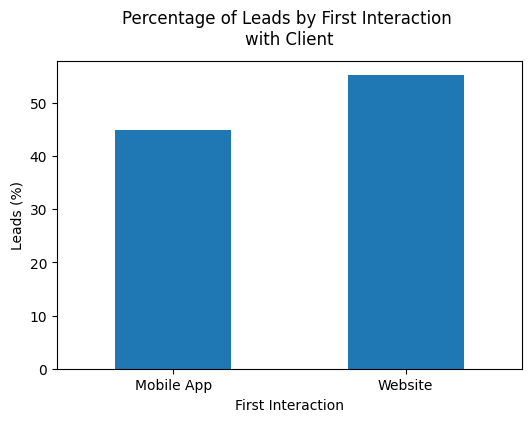

                   conv_rate     n
first_interaction                 
Website                45.59  2542
Mobile App             10.53  2070
p-valor (chi²): 2.611251831709229e-147


In [ ]:
# Percentage of leads by first interaction
fi_counts = data["first_interaction"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6,4))
fi_counts.plot(kind="bar")

plt.title("Percentage of Leads by First Interaction \nwith Client", pad=12)
plt.xlabel("First Interaction")
plt.ylabel("Leads (%)")
plt.xticks(rotation=0)
plt.show()

#Chi-squared test for proportions
print(conv_table(data, "first_interaction"))
p, ct = chi2_sig(data, "first_interaction")
print("p-valor (chi²):", p)

- Leads are almost evenly split: Website vs Mobile App.

- Conversion is much higher for Website (45.6%) than for Mobile App (10.5%).

- The chi-square test (p < 0.001) confirms that the first channel of interaction significantly affects conversion.

#### Question 3:  The company uses multiple modes to interact with prospects. Which way of interaction works best?


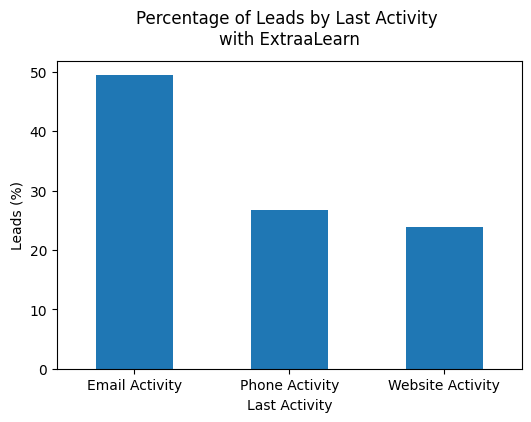

                  conv_rate     n
last_activity                    
Website Activity      38.45  1100
Email Activity        30.33  2278
Phone Activity        21.31  1234
p-valor (chi²): 1.4956453807549296e-18


In [ ]:
# Percentage of leads by first interaction
la_counts = data["last_activity"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6,4))
la_counts.plot(kind="bar")

plt.title("Percentage of Leads by Last Activity \nwith ExtraaLearn", pad=12)
plt.xlabel("Last Activity")
plt.ylabel("Leads (%)")
plt.xticks(rotation=0)
plt.show()

#Chi-squared test for proportions
print(conv_table(data, "last_activity"))
p, ct = chi2_sig(data, "last_activity")
print("p-valor (chi²):", p)

- Most leads had Email Activity, followed by Phone Activity and Website Activity.

- Conversion rates: Website Activity (38.5%) > Email Activity (30.3%) > Phone Activity (21.3%).

- The chi-square test (p < 0.001) confirms that the mode of last interaction significantly impacts conversion.

#### Question 4: The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?



             channel  conv_if_1(%)  conv_if_0(%)   diff_pp      chi2      p_value
            referral     67.741935     29.077229 38.664706 63.215149 1.853177e-15
   print_media_type2     32.188841     29.732816  2.456025  0.525324 4.685793e-01
   print_media_type1     31.991952     29.599028  2.392924  1.100884 2.940722e-01
       digital_media     31.878558     29.596083  2.282475  1.054740 3.044180e-01
educational_channels     27.943262     30.202201 -2.258939  1.349335 2.453945e-01


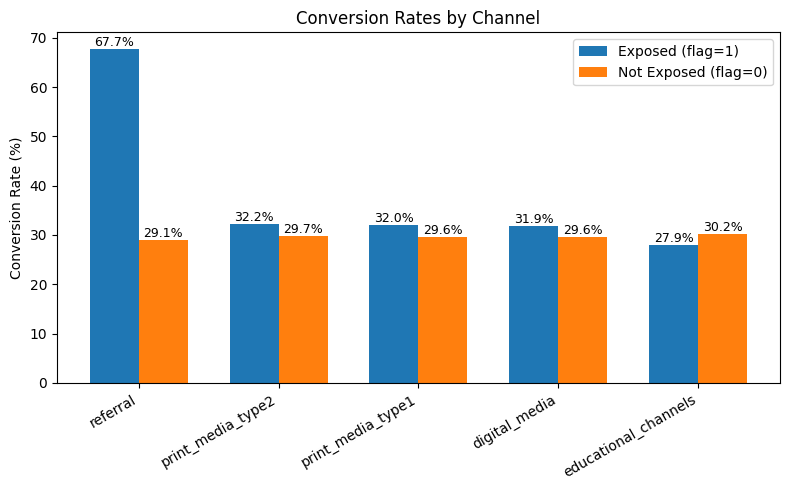

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

channels = ["print_media_type1","print_media_type2","digital_media","educational_channels","referral"]

results = []

for c in channels:
    # Conversion rates
    sub = data[[c, "status"]].dropna()
    r1 = sub.loc[sub[c] == 1, "status"].mean()
    r0 = sub.loc[sub[c] == 0, "status"].mean()
    diff = r1 - r0

    # Chi-square test
    contingency = pd.crosstab(sub[c], sub["status"])
    chi2, p, dof, expected = chi2_contingency(contingency)

    results.append([c, r1*100, r0*100, diff*100, chi2, p])

# Results table
rates_df = pd.DataFrame(
    results,
    columns=["channel", "conv_if_1(%)", "conv_if_0(%)", "diff_pp", "chi2", "p_value"]
).sort_values("conv_if_1(%)", ascending=False)

print(rates_df.to_string(index=False))

# Ensure channel order is preserved
channels = rates_df["channel"].tolist()
conv1 = rates_df["conv_if_1(%)"].tolist()
conv0 = rates_df["conv_if_0(%)"].tolist()

x = np.arange(len(channels))  # positions
width = 0.35                  # bar width

plt.figure(figsize=(8,5))
bars1 = plt.bar(x - width/2, conv1, width, label="Exposed (flag=1)")
bars0 = plt.bar(x + width/2, conv0, width, label="Not Exposed (flag=0)")

# Titles and labels
plt.title("Conversion Rates by Channel")
plt.ylabel("Conversion Rate (%)")
plt.xticks(x, channels, rotation=30, ha="right")
plt.legend()

# Add value labels on top
for bar in bars1 + bars0:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

- Referrals show the highest conversion rate (67.7% vs 29.1% for non-referrals). This effect is highly significant (χ² p < 0.001).

- Print media (newspaper, magazine) and digital media show only small differences, not statistically significant (p > 0.05).

- Educational channels actually perform slightly worse than the baseline (27.9% vs 30.2%), also not significant.

#### Question 5: People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?



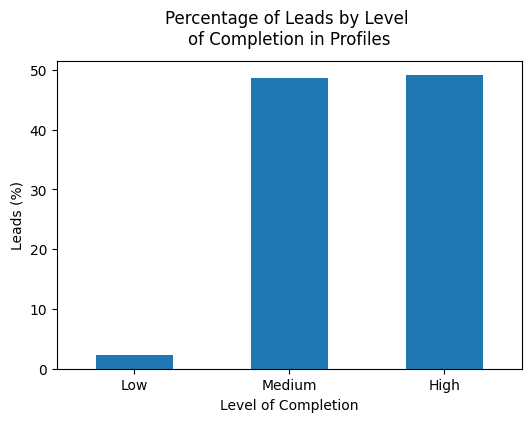

                   conv_rate     n
profile_completed                 
High                   41.78  2264
Medium                 18.88  2241
Low                     7.48   107
p-valor (chi²): 1.0602795584133875e-67


In [ ]:
# Percentage of leads by first interaction
data["profile_completed"] = pd.Categorical(data["profile_completed"], categories=["Low","Medium","High"], ordered=True)

la_counts = data["profile_completed"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(6,4))
la_counts.plot(kind="bar")

plt.title("Percentage of Leads by Level \nof Completion in Profiles", pad=12)
plt.xlabel("Level of Completion")
plt.ylabel("Leads (%)")
plt.xticks(rotation=0)
plt.show()

#Chi-squared test for proportions
print(conv_table(data, "profile_completed"))
p, _ = chi2_sig(data, "profile_completed")
print("p-valor (chi²):", p)

- Distribution: most leads fall into Medium and High, while Low is rare.

- Conversion rates increase sharply with completion: High (41.8%) > Medium (18.9%) > Low (7.5%).

- The chi-square test (p < 0.001) confirms that profile completion level has a strong and significant effect on conversion.

## Building a Decision Tree model

In [ ]:
#Create a copy of original data
data_copy = data.copy()

#Remove ID column before get_dummies
data_copy = data_copy.drop(["ID"],axis=1)
data_copy = pd.get_dummies(data_copy,
               columns = data_copy.select_dtypes(include=["object","category"]).columns.tolist(),
                           drop_first = True
               )

#Convert True/False generated by get_dummies to 1/0
data_copy[data_copy.select_dtypes(include="bool").columns] = data_copy[data_copy.select_dtypes(include="bool").columns].astype(int)
data_copy.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Medium,profile_completed_High,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,0,1,1,0,1,0,1
1,56,2,83,0.320,0,0,0,1,0,0,0,0,0,1,0,0,1
2,52,3,330,0.074,0,0,1,0,0,0,0,0,1,1,0,0,1
3,53,4,464,2.057,0,0,0,0,0,1,0,1,1,0,1,0,1
4,23,4,600,16.914,0,0,0,0,0,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Split data into train and test sets
X = data_copy.drop("status",axis=1)
y = data_copy["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Create and fit Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate model performance
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

print("Train Set Metrics:\n")
print(classification_report(y_train, y_pred_train))

print("-"*50)
print("Test Set Metrics:\n")
print(classification_report(y_test, y_pred))

Train Set Metrics:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       1.00      1.00      1.00      1103

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689

--------------------------------------------------
Test Set Metrics:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       649
           1       0.68      0.66      0.67       274

    accuracy                           0.81       923
   macro avg       0.77      0.77      0.77       923
weighted avg       0.81      0.81      0.81       923



Observing the training metrics, we can identify clear signs of overfitting in the model. To mitigate this behavior, it is recommended to apply pruning techniques. One effective approach is to set the max_depth parameter, which limits the maximum depth of the decision tree and helps improve its generalization performance.

In [ ]:
# Create and fit Decision Tree Classifier Pruned
clf_pruned = DecisionTreeClassifier(max_depth=3,random_state=42)
clf_pruned.fit(X_train, y_train)

# Evaluate model performance
y_pred = clf_pruned.predict(X_test)
y_pred_train = clf_pruned.predict(X_train)

print("Pruned Train Set Metrics:\n")
print(classification_report(y_train, y_pred_train))

print("-"*50)
print("Pruned Test Set Metrics:\n")
print(classification_report(y_test, y_pred))

Pruned Train Set Metrics:

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      2586
           1       0.80      0.49      0.61      1103

    accuracy                           0.81      3689
   macro avg       0.80      0.72      0.74      3689
weighted avg       0.81      0.81      0.80      3689

--------------------------------------------------
Pruned Test Set Metrics:

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       649
           1       0.78      0.46      0.58       274

    accuracy                           0.80       923
   macro avg       0.79      0.70      0.72       923
weighted avg       0.80      0.80      0.78       923



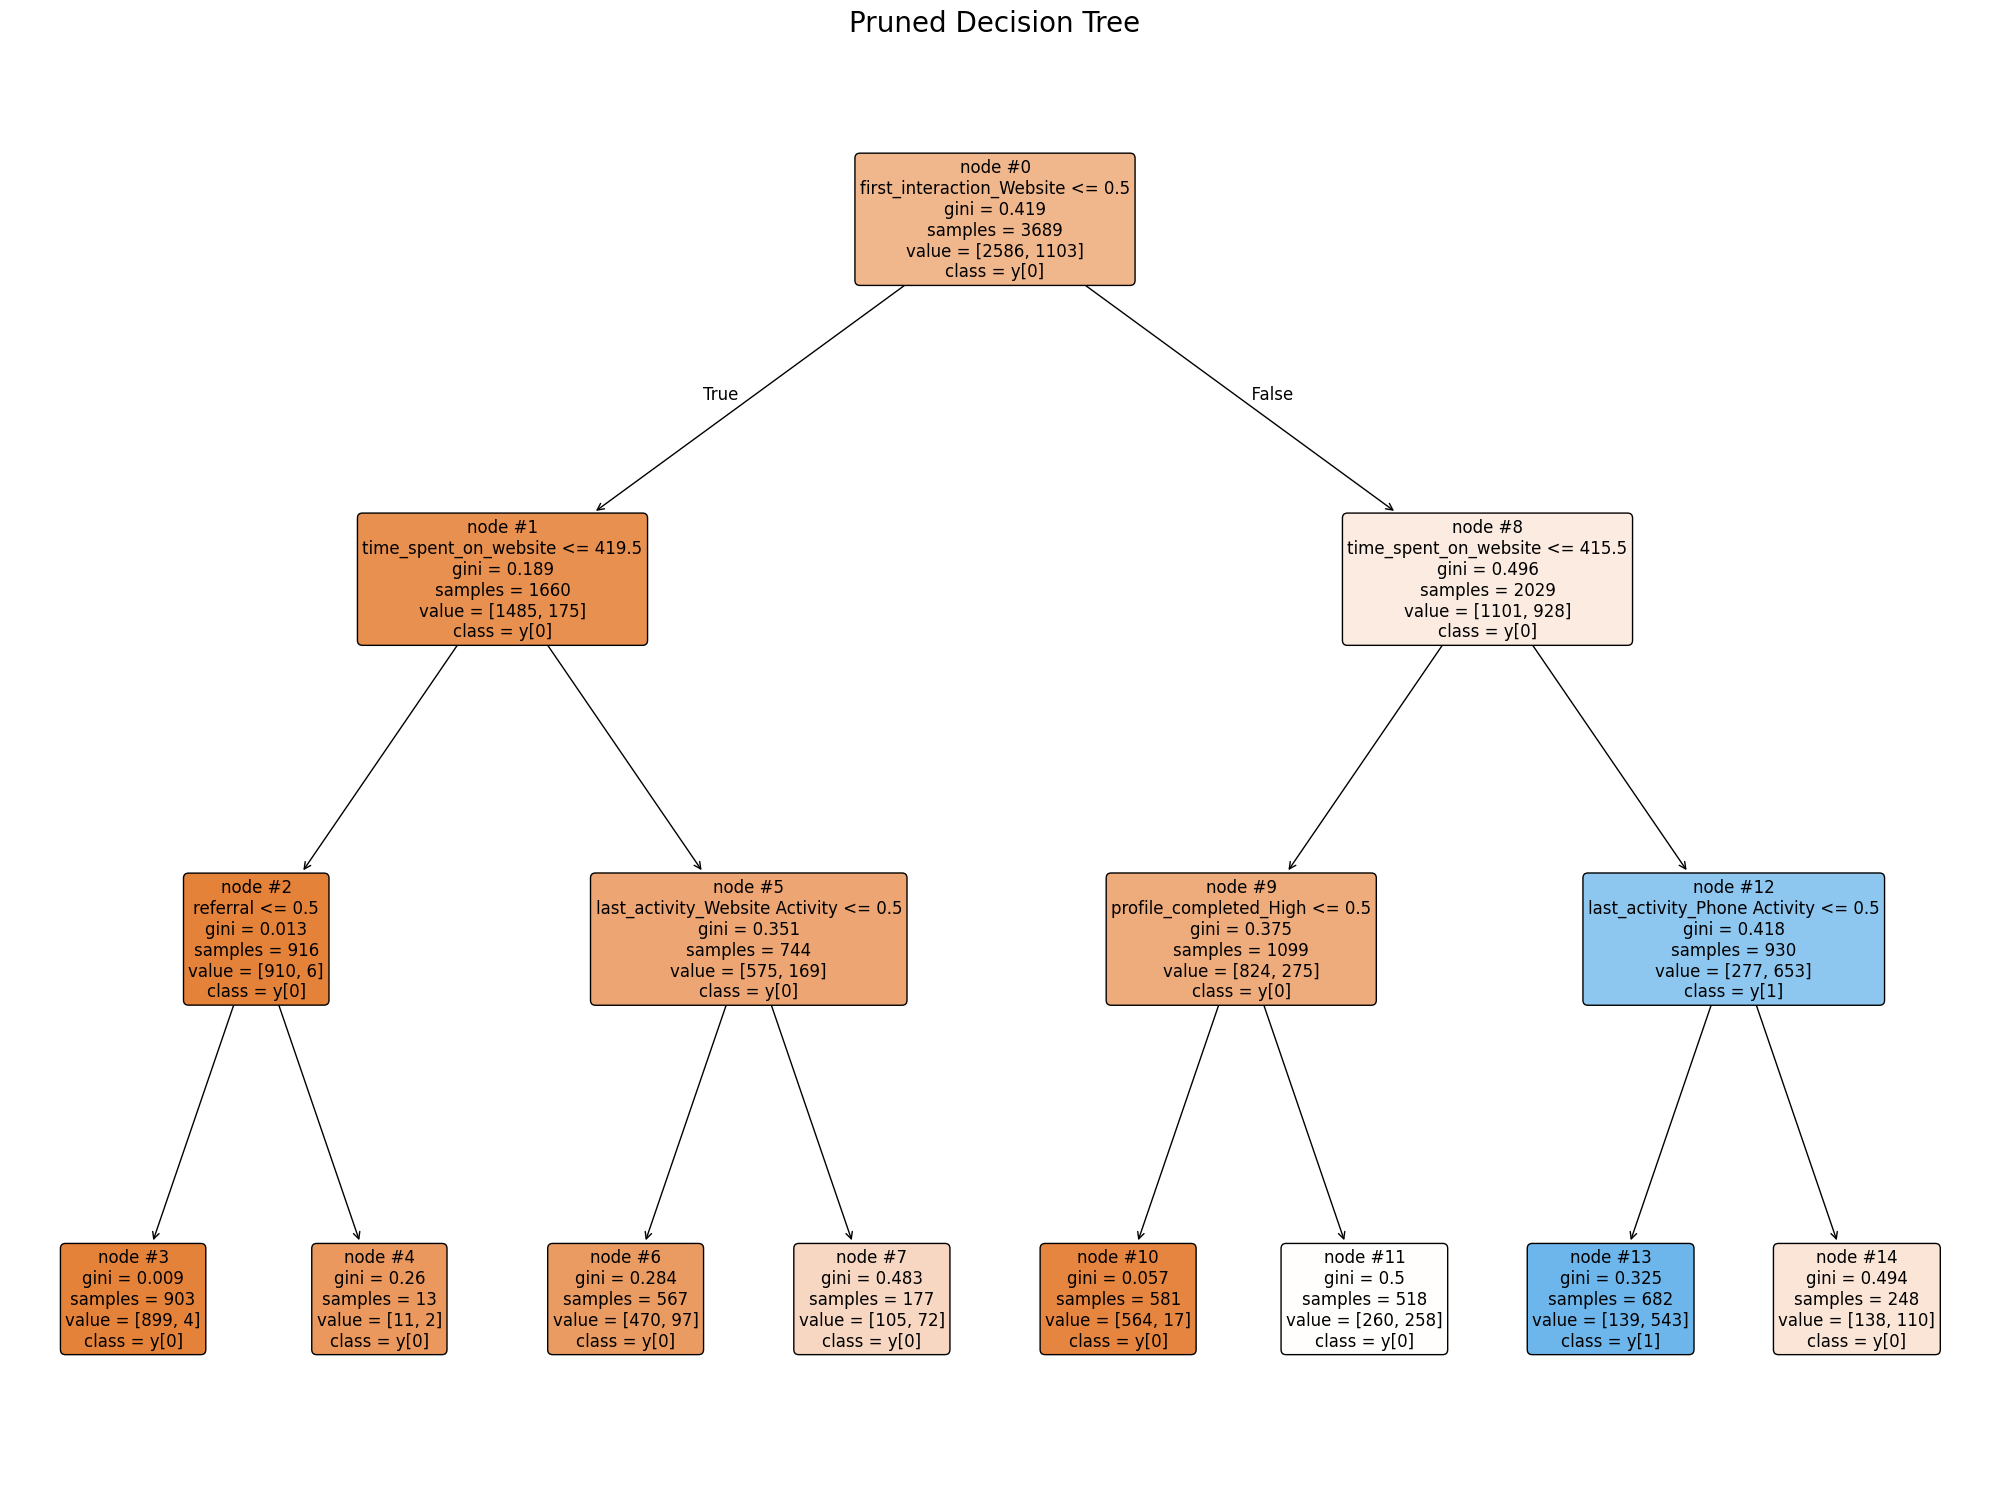

In [ ]:
from sklearn import tree
features = X_train.columns

#Visualize trained model
plt.figure(figsize=(20, 15))
tree.plot_tree(clf_pruned, feature_names=features, filled=True, rounded=True, fontsize=12, node_ids=True, class_names=True)
plt.title("Pruned Decision Tree", fontsize=20)
plt.tight_layout()
plt.show()

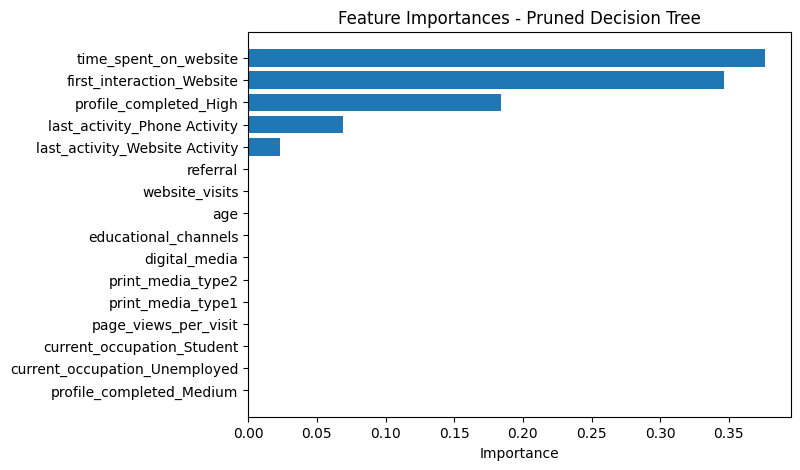

In [ ]:
# Get feature importances
importances = clf_pruned.feature_importances_
feat_names = X_train.columns

# Put into DataFrame
feat_imp_df = pd.DataFrame({
    "feature": feat_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# Plot top features
plt.figure(figsize=(7,5))
plt.barh(feat_imp_df["feature"], feat_imp_df["importance"])
plt.gca().invert_yaxis()  # Highest importance at top
plt.title("Feature Importances - Pruned Decision Tree")
plt.xlabel("Importance")
plt.show()

## Do we need to prune the tree?

Since clear signs of overfitting were observed in the model, pruning was applied. After this adjustment, the metrics between the training and testing sets became much more consistent, indicating that pruning was effective and that the model no longer exhibits signs of overfitting.

## Building a Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate model performance
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print("Train Set Metrics:\n")
print(classification_report(y_train, y_pred_train))

print("-"*50)
print("Test Set Metrics:\n")
print(classification_report(y_test, y_pred))

Train Set Metrics:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2586
           1       1.00      1.00      1.00      1103

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689

--------------------------------------------------
Test Set Metrics:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.83      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.86      0.82      0.83       923
weighted avg       0.87      0.87      0.86       923



In a Random Forest model, overfitting is controlled by limiting the complexity of the base estimators through hyperparameters such as max_depth, min_samples_leaf, or max_features.

In this case, the training metrics indicate perfect fitting (100%), while the test metrics are significantly lower, suggesting overfitting. To address this, we could restrict tree depth or increase the minimum samples per leaf to improve generalization

## Do we need to prune the tree?

In [ ]:
# Create and fit Random Forest Classifier model Pruned
rf_pruned = RandomForestClassifier(max_depth=8,min_samples_leaf=10,max_samples=0.8,random_state=42)
rf_pruned.fit(X_train, y_train)

# Evaluate model performance
y_pred = rf_pruned.predict(X_test)
y_pred_train = rf_pruned.predict(X_train)

print("Pruned Train Set Metrics:\n")
print(classification_report(y_train, y_pred_train))

print("-"*50)
print("Pruned Test Set Metrics:\n")
print(classification_report(y_test, y_pred))

Pruned Train Set Metrics:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2586
           1       0.82      0.72      0.77      1103

    accuracy                           0.87      3689
   macro avg       0.86      0.83      0.84      3689
weighted avg       0.87      0.87      0.87      3689

--------------------------------------------------
Pruned Test Set Metrics:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.82      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.85      0.82      0.83       923
weighted avg       0.86      0.87      0.86       923



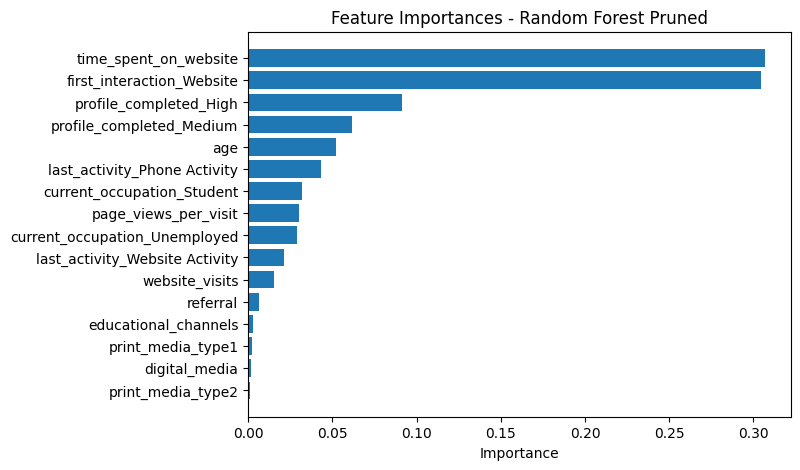

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest
importances = rf_pruned.feature_importances_
feat_names = X_train.columns

# Put into DataFrame
feat_imp_df = pd.DataFrame({
    "feature": feat_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# Plot top features
plt.figure(figsize=(7,5))
plt.barh(feat_imp_df["feature"], feat_imp_df["importance"])
plt.gca().invert_yaxis()  # Highest importance at top
plt.title("Feature Importances - Random Forest Pruned")
plt.xlabel("Importance")
plt.show()


## Actionable Insights and Recommendations


- Both models highlight time_spent_on_website and first_interaction_Website as the most influential predictors of lead conversion.

**Decision Tree:**

- Strongly concentrated on few features (time spent, first interaction, profile completion, last activity).

- Simpler, easier to interpret, but may miss subtler signals.

- Ignores most channels and demographic features.

**Random Forest:**

- Distributes importance across a wider set of features (occupation, page views, website visits, etc.).

- Captures more complex relationships, improving predictive power.

- Still confirms the dominance of engagement (time spent) and entry channel (website).

**Website engagement is the strongest driver**

- Time spent on the website is consistently the most important feature.

- Leads who invest more time are far more likely to convert.
Recommendation: encourage deeper browsing (longer sessions, engaging content, interactive tools).

**First interaction matters**

- Leads whose first contact is via Website have much higher conversion than those starting on the Mobile App.
Recommendation: strengthen website onboarding, while optimizing the mobile app funnel to reduce drop-offs.

**Profile completion boosts conversion***

- A highly completed profile strongly increases conversion likelihood.
- Recommendation: incentivize leads to complete profiles (progress bars, gamification, reminders).

**Last activity influences conversion**

- Phone and website activities play a relevant role in the Decision Tree, while the Random Forest also weights email interactions.
- Recommendation: diversify follow-up strategies but prioritize website re-engagement and phone follow-ups.

**Occupation signals conversion potential**

- The Random Forest assigns non-negligible importance to occupation (Professional > Unemployed > Student).
- Recommendation: tailor messaging by occupation segment, focusing on professionals for higher ROI.

**Referral channel is powerful but underused**

- Even though referrals don’t appear highly in feature importance (due to low volume), earlier analysis shows they yield the highest conversion rates.
- Recommendation: invest in referral programs, expand incentives for word-of-mouth leads.